In [285]:
# import pandas as pd
# import numpy as np

In [286]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # стиль графиков
# # plt.style.use('ggplot')    
# plt.style.use('fivethirtyeight')
# %matplotlib inline

In [68]:
# bpass = pd.read_csv('bpass.csv')
# bpass = bpass.drop_duplicates(['user_id', 'dt'])

In [69]:
# bpass = bpass.dropna()

In [70]:
# bpass['dt'] = pd.to_datetime(bpass['dt'], format='%Y-%m-%d')
# bpass['lvl_date'] = pd.to_datetime(bpass['lvl_date'], format='%Y-%m-%d')
# bpass['first_touch_date'] = pd.to_datetime(bpass['first_touch_date'], format='%Y-%m-%d')
# bpass.level_before_purch = bpass.level_before_purch.astype(int)

In [287]:
# bpass.info()

In [114]:
# bpass = bpass.drop(['type'], axis=1)
# s = bpass.groupby('user_id').dt.count().to_frame(name='count')

In [73]:
# bpass=bpass.merge(s, on='user_id')

In [81]:
# bpass=bpass.loc[bpass['count'] > 1, :]

# Посчитаем уникальное число покупателей для каждого дня.

In [264]:
# df_day = (
#     bpass.groupby('dt')
#     .agg({'user_id': 'count'})
#     .sort_values('dt')
)
# df_day

### Дни, когда было совершено более одной покупки БП. ↓

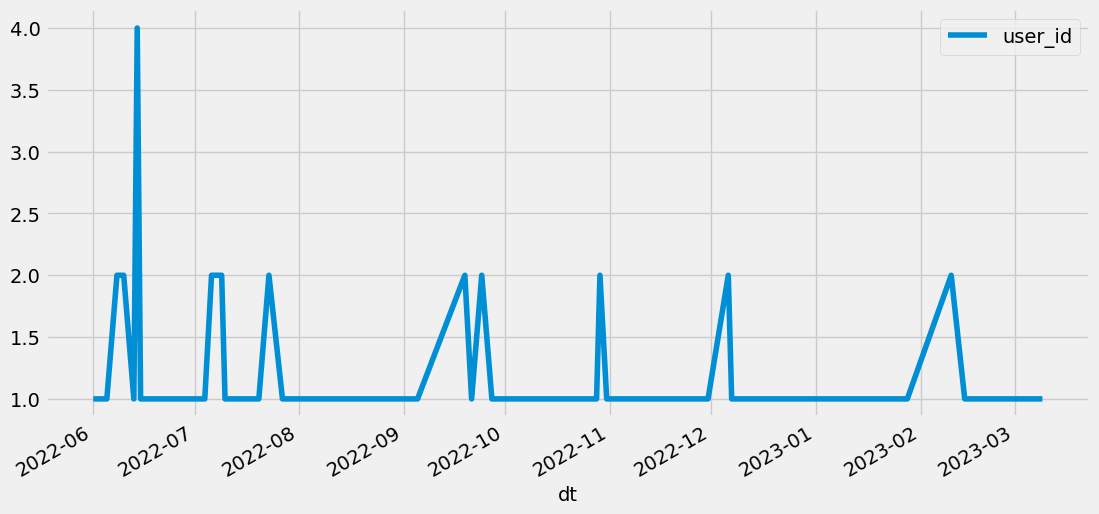

In [106]:
df_day.plot(figsize=(12,6));
# дни, когда было совершено более одной покупки БП.

In [268]:
# bpass['deltatime_buy'] = (bpass['dt'] - bpass['first_touch_date'])/np.timedelta64(1,'D')

### В большинстве своем БП покупают сразу после регистрации. Мы видим всплески с интервалом ~20 дней. Можно предположить, что за такой срок проходится сезон БП. Данные за первые 100 дней игры ↓

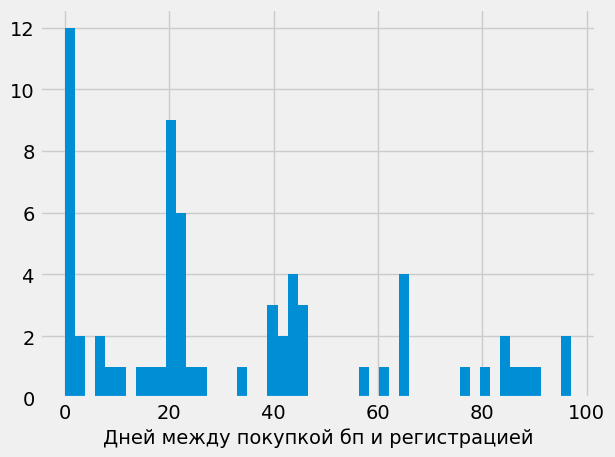

In [282]:
bpass.loc[bpass.deltatime_buy < 100, 'deltatime_buy'].hist(bins=50)
plt.xlabel('Дней между покупкой бп и регистрацией');

### В среднем для неоднократно купивших БП проходит 32 дней с момента первого запуска до покупки БП. Медиана - 22 дня. Данные за первые 100 дней игры ↓

In [284]:
bpass.loc[bpass.deltatime_buy < 100, 'deltatime_buy'].describe()

count    66.000000
mean     32.924242
std      28.720569
min       0.000000
25%       9.250000
50%      22.000000
75%      45.000000
max      97.000000
Name: deltatime_buy, dtype: float64

### Из 190 покупок БП повторных было 75 (т.е. они купили БП больше 1 раза). Здесь видно, сколько именно раз покупали БП повторно. По оси X - число покупок, по Y - сколько раз встречается это значение. ↓

<Axes: >

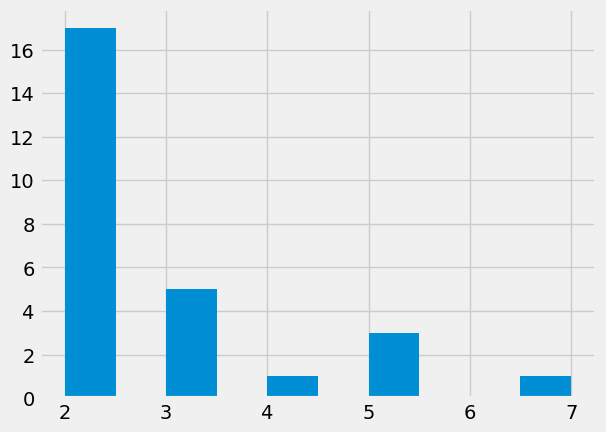

In [120]:
bpass.groupby('user_id')['count'].count().hist()

### Представители повторных покупок по странам

<Axes: >

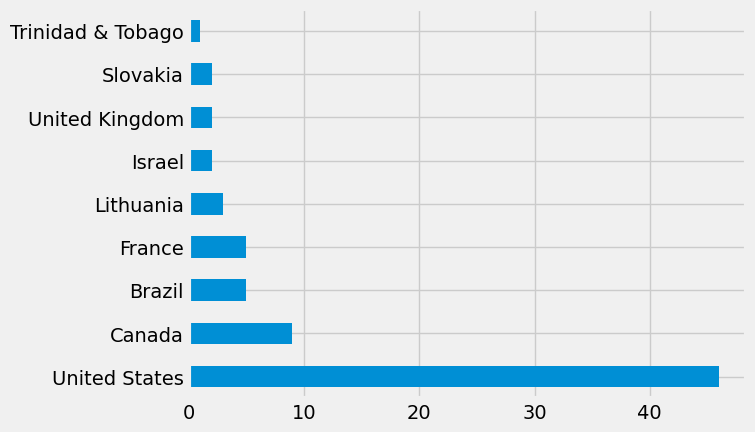

In [289]:
bpass.country.value_counts().plot(kind='barh')

# Попытки посмотреть, что именно влияет на частоту покупок БП. ↓

In [240]:
# X_train = bpass.drop(['count', 'user_id', 'dt', 'first_touch_date','lvl_date','version', 'country'], axis=1)
# y_train = bpass['count']

In [241]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# encoder_df = encoder.fit_transform(X_train[['platform','traffic_source']])
# ohe_df = pd.DataFrame(encoder_df.toarray(),
# columns=encoder.get_feature_names_out())

In [242]:
# X_train=X_train.reset_index().join(ohe_df).drop(['platform', 'traffic_source','index'], axis=1)

In [244]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

In [245]:
# from xgboost import XGBClassifier

# model = XGBClassifier()
# model.fit(X_train, y_train)
# importances = pd.DataFrame(data={
#     'Attribute': X_train.columns,
#     'Importance': model.feature_importances_
# })
# importances = importances.sort_values(by='Importance', ascending=False)

<Axes: ylabel='Attribute'>

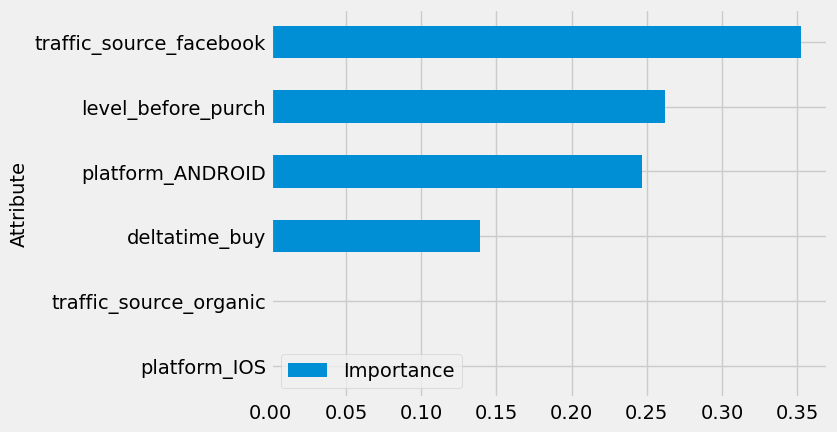

In [290]:
importances.sort_values('Importance',ascending=True).plot(x = 'Attribute', y = 'Importance', kind = 'barh')

In [247]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

In [248]:
# clf = RandomForestClassifier()
# params = {'n_estimators': [5,10,20,30,40,50], 'max_depth': [2,3,4,5,10]}

In [252]:
# GS = GridSearchCV(clf,params, cv=4)

In [253]:
# GS.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 40, 50]})

In [258]:
# be = GS.best_estimator_
# fi = be.feature_importances_

<Axes: ylabel='feature'>

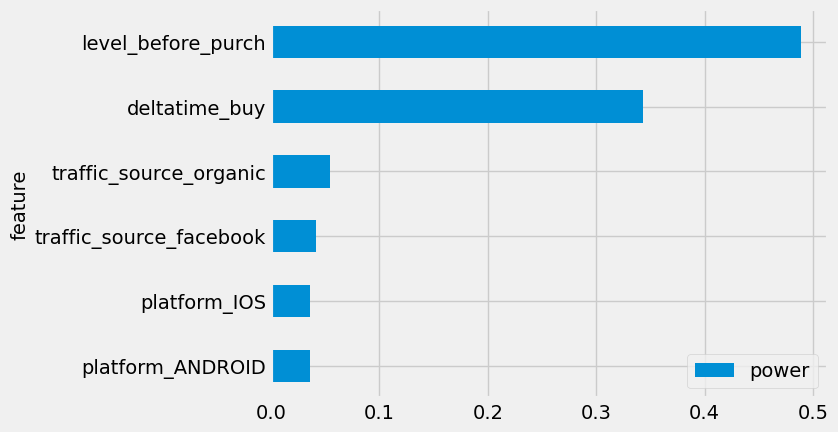

In [262]:
fiData = pd.DataFrame({'feature': list(X_train), 'power': fi}).set_index('feature')
fiData.sort_values('power', ascending=True).plot(kind='barh')